<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Разбивка-на-выборки" data-toc-modified-id="Разбивка-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разбивка на выборки</a></span></li></ul></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Обучение-линейной-регрессии" data-toc-modified-id="Обучение-линейной-регрессии-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение линейной регрессии</a></span></li><li><span><a href="#Обучение-дерева-решений" data-toc-modified-id="Обучение-дерева-решений-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение дерева решений</a></span></li><li><span><a href="#Обучение-RandomForest" data-toc-modified-id="Обучение-RandomForest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение RandomForest</a></span></li><li><span><a href="#Обучение-модели-градиентного-бустинга" data-toc-modified-id="Обучение-модели-градиентного-бустинга-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение модели градиентного бустинга</a></span></li><li><span><a href="#Cat-Boost-с-подбором-параметров-GridSearch" data-toc-modified-id="Cat-Boost-с-подбором-параметров-GridSearch-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Cat Boost с подбором параметров GridSearch</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Сравнение моделей</a></span></li><li><span><a href="#Прогнозирование-заболеваемости-моделью-ARIMA" data-toc-modified-id="Прогнозирование-заболеваемости-моделью-ARIMA-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Прогнозирование заболеваемости моделью ARIMA</a></span><ul class="toc-item"><li><span><a href="#Обучение" data-toc-modified-id="Обучение-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Прогноз" data-toc-modified-id="Прогноз-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Прогноз</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Прогнозирование вторичных продаж

Компания занимается оптовыми поставками препаратов *** на российский рынок. Из-за несовершенства имеющихся инструментов прогнозирования на складе регулярно возникают over_stock out_of_stock. В первом случае компания несет повышенные издержки на содержание складских запасов, во втором - теряет продажи и, соответственно, прибыль. Логистическое плечо (срок от заказа товара изготовителю до его доставки на локальный склад) занимает 6-8 месяцев. Для уменьшения этих издержек и повышения качества прогнозирования нужен новый более точный инструмент. Необходимо разработать модель, прогнозирующую продажи на 1, 3, 12 месяцев.

Целевая точность прогноза не менее 80%, при достижении 90% можно считать проект крайне успешным.
Т.е. MAE итоговой модели должна составлять не более 20% от среднемесячных продаж, желательно не более 10%.

План работ:

1. Загрузить данные и выполнить их ресемплирование по одному месяцу, кварталу, если нужно.
2. Проанализировать данные.
3. Выявить признаки, наиболее сильно влияющие на продажи.
4. Обучить разные модели с различными гиперпараметрами. Сделать валидационную выборку размером 10% от исходных данных.
5. Выбрать лучшую модель.
6. Проверить данные на тестовом периоде и сделать выводы.


Данные лежат в файле `для моделирования.xlsx`.

Препарат относится к применяемым при простудных заболеваниях. На этапе предобработки выявлено, что его продажи значительно коррелируют с заболеваеостью гриппом и ОРВИ. Поэтому для усиления модели с сайта:
https://www.influenza.spb.ru/system/epidemic_situation/laboratory_diagnostics/

подгружены данные по заболеваемости в количестве случаев на 100 000 человек.

**Особенность проекта:** код должен быть оптимизирован для использования неопытным пользователем python. Т.е. вмешательство конечного пользователя в код должно быть минимальным или вовсе отсутствовать.

## Анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import datetime
from dateutil.relativedelta import *

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SARIMAX, AutoReg
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima.utils import ndiffs


RANDOM_STATE=12345

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={"figure.figsize":(12, 7)})

In [2]:
#читаем данные, сразу заполняем пропуски нулями

data = pd.read_excel(r'C:\Users\Xiaomi\Desktop\Oleg\Docs\ML\public\для моделирования.xlsx',
                     sheet_name='Brand 1m')
data = data.fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                226 non-null    object 
 1   Year                 226 non-null    int64  
 2   Month                226 non-null    int64  
 3   Q-ty                 226 non-null    int64  
 4   out_of_stock         226 non-null    float64
 5   promo                226 non-null    float64
 6   high_season          226 non-null    float64
 7   last_month_of_quart  226 non-null    float64
 8   epidemic             226 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 16.0+ KB


In [3]:
display(data.tail(5))

,Brand,Year,Month,Q-ty,out_of_stock,promo,high_season,last_month_of_quart,epidemic
221,Brand 1,2022,6,54926,0.0,0.0,0.0,1.0,415
222,Brand 1,2022,7,39554,0.0,0.0,0.0,0.0,0
223,Brand 1,2022,8,73294,0.0,0.0,0.0,0.0,0
224,Brand 1,2022,9,160973,0.0,1.0,0.0,1.0,863
225,Brand 1,2022,10,69305,0.0,0.0,1.0,0.0,663


In [4]:
data.index = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

data.head()

,Brand,Year,Month,Q-ty,out_of_stock,promo,high_season,last_month_of_quart,epidemic
2004-01-01,Brand 1,2004,1,22189,0.0,0.0,1.0,0.0,471
2004-02-01,Brand 1,2004,2,31064,0.0,0.0,1.0,0.0,768
2004-03-01,Brand 1,2004,3,62128,0.0,0.0,1.0,1.0,598
2004-04-01,Brand 1,2004,4,35502,0.0,0.0,0.0,0.0,434
2004-05-01,Brand 1,2004,5,24851,0.0,0.0,0.0,0.0,293


In [5]:
#сортируем индексы/даты на случай если где-то они идут не по порядку
data.sort_index(inplace=True)
data = data.drop(['Brand', 'Year', 'Month'], axis=1)
display(data.head(5))

,Q-ty,out_of_stock,promo,high_season,last_month_of_quart,epidemic
2004-01-01,22189,0.0,0.0,1.0,0.0,471
2004-02-01,31064,0.0,0.0,1.0,0.0,768
2004-03-01,62128,0.0,0.0,1.0,1.0,598
2004-04-01,35502,0.0,0.0,0.0,0.0,434
2004-05-01,24851,0.0,0.0,0.0,0.0,293


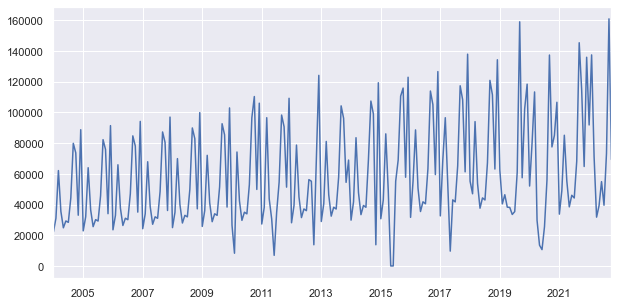

In [6]:
data['Q-ty'].plot(grid=True, figsize=(10, 5));

Продажи препарата имеют ярко выраженную сезонность - летом продажи снижаются. Также есть характерные пики отгрузок в последние месяцы квартала - в эти месяцы аптечные сети обычно закупают повышенные объемы.

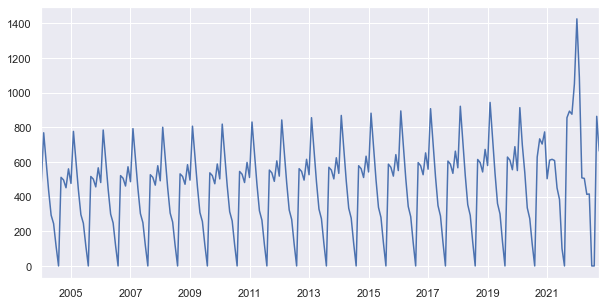

In [7]:
data['epidemic'].plot(grid=True, figsize=(10, 5));

График заболеваемости имеет ярко выраженную цикличность, поэтому ее можно с достаточной точностью прогнозировать моделью ARIMA.

## Подготовка

In [8]:
#функция для подготовки признаков
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['year'] = data.index.year
    
    #добавляем лаги для авторегрессии
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['Q-ty'].shift(lag)

    #добавляем скользящее среднее
    data['rolling_mean'] = data['Q-ty'].shift().rolling(rolling_mean_size).mean()

In [9]:
#экспериментально выявить лучшие параметры - в нашем случае (2, 2)
make_features(data, 2, 2)

data.head(5)
data.tail(5)

,Q-ty,out_of_stock,promo,high_season,last_month_of_quart,epidemic,month,year,lag_1,lag_2,rolling_mean
2022-06-01,54926,0.0,0.0,0.0,1.0,415,6,2022,39263.0,31786.0,35524.5
2022-07-01,39554,0.0,0.0,0.0,0.0,0,7,2022,54926.0,39263.0,47094.5
2022-08-01,73294,0.0,0.0,0.0,0.0,0,8,2022,39554.0,54926.0,47240.0
2022-09-01,160973,0.0,1.0,0.0,1.0,863,9,2022,73294.0,39554.0,56424.0
2022-10-01,69305,0.0,0.0,1.0,0.0,663,10,2022,160973.0,73294.0,117133.5


In [10]:
#changing data types
data['out_of_stock'] = data['out_of_stock'].astype('int')
data['promo'] = data['promo'].astype('int')
data['high_season'] = data['high_season'].astype('int')
data['last_month_of_quart'] = data['last_month_of_quart'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2004-01-01 to 2022-10-01
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Q-ty                 226 non-null    int64  
 1   out_of_stock         226 non-null    int32  
 2   promo                226 non-null    int32  
 3   high_season          226 non-null    int32  
 4   last_month_of_quart  226 non-null    int32  
 5   epidemic             226 non-null    int64  
 6   month                226 non-null    int64  
 7   year                 226 non-null    int64  
 8   lag_1                225 non-null    float64
 9   lag_2                224 non-null    float64
 10  rolling_mean         224 non-null    float64
dtypes: float64(3), int32(4), int64(4)
memory usage: 17.7 KB


In [11]:
#после анализа корреляций убираем признаки, приводящие к мультиколлинеарности
data = data.drop(['high_season'], axis=1)

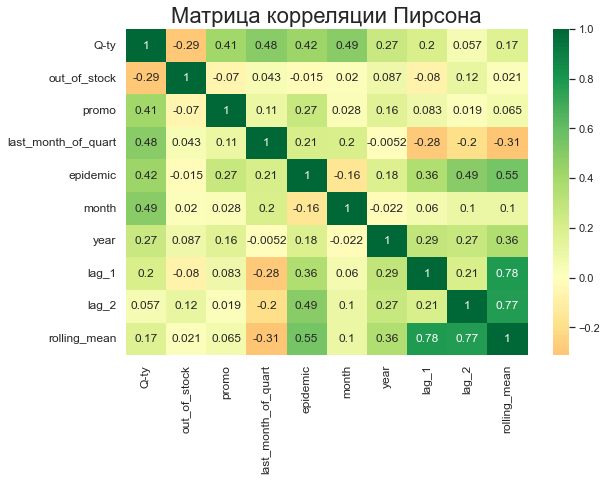

In [12]:
#матрица корреляций Пирсона

plt.figure(figsize=(9, 6))
sns.heatmap(data.corr(),
            xticklabels=data.corr().columns,
            yticklabels=data.corr().columns,
            cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции Пирсона', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

interval columns not set, guessing: ['Q-ty', 'out_of_stock', 'promo', 'last_month_of_quart', 'epidemic', 'month', 'year', 'lag_1', 'lag_2', 'rolling_mean']
interval columns not set, guessing: ['Q-ty', 'out_of_stock', 'promo', 'last_month_of_quart', 'epidemic', 'month', 'year', 'lag_1', 'lag_2', 'rolling_mean']
interval columns not set, guessing: ['Q-ty', 'out_of_stock', 'promo', 'last_month_of_quart', 'epidemic', 'month', 'year', 'lag_1', 'lag_2', 'rolling_mean']


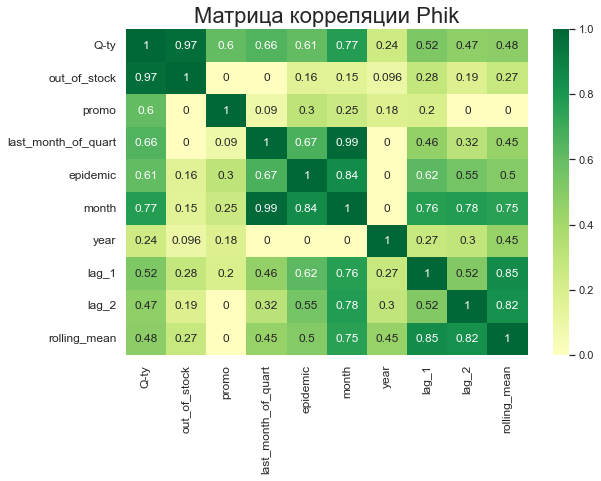

In [13]:
#матрица корреляций phik
plt.figure(figsize=(9, 6))
sns.heatmap(data.phik_matrix(),
            xticklabels=data.phik_matrix().columns,
            yticklabels=data.phik_matrix().columns,
            cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции Phik', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Синтетический признак high_season нелинейно, но сильно коррелирует с месяцем. Во избежание мультиколлинеарности удалим его.

### Разбивка на выборки

In [14]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop(['Q-ty'], axis=1)
target_train = train['Q-ty']

features_test = test.drop(['Q-ty'], axis=1)
target_test = test['Q-ty']

#проверка корректности разбивки
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2004-03-01 00:00:00 2020-11-01 00:00:00
2020-12-01 00:00:00 2022-10-01 00:00:00


In [15]:
test.head()

,Q-ty,out_of_stock,promo,last_month_of_quart,epidemic,month,year,lag_1,lag_2,rolling_mean
2020-12-01,106632,0,0,1,773,12,2020,85098.0,77526.0,81312.0
2021-01-01,33747,0,0,0,503,1,2021,106632.0,85098.0,95865.0
2021-02-01,49152,0,0,0,610,2,2021,33747.0,106632.0,70189.5
2021-03-01,85151,0,0,1,615,3,2021,49152.0,33747.0,41449.5
2021-04-01,55414,0,0,0,608,4,2021,85151.0,49152.0,67151.5


## Константная модель

In [16]:
def model_metrics(model, features_train, features_test, target_train, target_test):
    
    print('MAE на обучении:', mean_absolute_error(target_train, model.predict(features_train))),
    print('MAE на валидации:', mean_absolute_error(target_test, model.predict(features_test))),
    print(),
    print('Реальное кол-во в следующий месяц:', target_test[0]),
    print('Предсказанное кол-во:', model.predict(features_test)[0])

In [17]:
constant = np.ones(len(target_test)) * target_test.mean()

rmse_constant = mean_squared_error(target_test, constant) ** .5
mae_constant = mean_absolute_error(target_test, constant)

print('Benchmark:', constant[0])
print('MAE:', mae_constant)

Benchmark: 76403.30434782608
MAE: 31878.657844990543


Константная модель нужна для проверки моделей на адекватность. Если МАЕ модели будет близко к МАЕ константной модели, это будет означать очень низкую точность модели. Если же МАЕ модели будет значительно ниже МАЕ константы, значит модель прошла проверку на адекватность.

In [18]:
#функция для вывода графиков сравнения target / prediction
def plot_predict(df_prediction, target_train):
    plt.figure(figsize=(9, 3))
    plt.plot(target_train, label='true')
    plt.plot(temp_df, label='pred')
    plt.xlabel('date')
    plt.ylabel('value')
    plt.title('Original / Predicted series')
    plt.legend()
    plt.show() 

## Обучение линейной регрессии

In [19]:
#масштабирование
features_lr_train = features_train.copy()
scaler = StandardScaler()
features_lr_train = scaler.fit_transform(features_lr_train)
features_lr_test = scaler.transform(features_test)

In [20]:
model = LinearRegression()
model.fit(features_lr_train, target_train)

mae_lr_train = mean_absolute_error(target_train, model.predict(features_lr_train))
mae_lr_test = mean_absolute_error(target_test, model.predict(features_lr_test))

predictions_lr = model.predict(features_lr_test)

In [21]:
model_metrics(model, features_lr_train, features_lr_test, target_train, target_test)

MAE на обучении: 11059.403002704863
MAE на валидации: 16955.11564400451

Реальное кол-во в следующий месяц: 106632
Предсказанное кол-во: 129863.99898328903


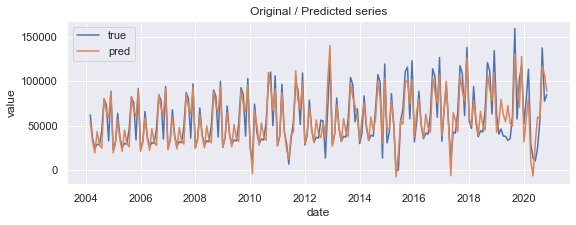

In [22]:
#сравним предсказания с реальными данными на обучении
temp_df = pd.DataFrame(model.predict(scaler.transform(features_train)), index=target_train.index)

plot_predict(temp_df, target_train)

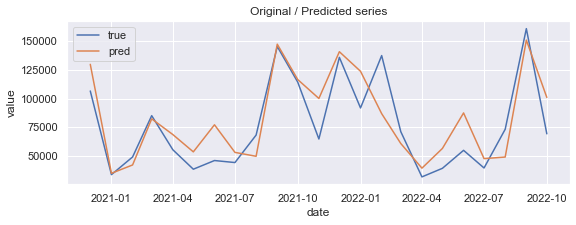

In [23]:
#сравним предсказания на тестовой выборке с реальными значениями
temp_df = pd.DataFrame(model.predict(scaler.transform(features_test)), index=target_test.index)

plot_predict(temp_df, target_test)

## Обучение дерева решений

In [24]:
#дерево решений

best_mae = 1000000
best_depth=0

for depth in range(1, 5):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_tree = model.predict(features_test)
    mae = mean_absolute_error(target_test, predictions_tree)
    
    if mae < best_mae:
        best_mae_tree = mae
        best_depth = depth

model = DecisionTreeRegressor(random_state=12345, max_depth=best_depth)
model.fit(features_train, target_train)
tree_pred = model.predict(features_test)

mae_tree_train = mean_absolute_error(target_train, model.predict(features_train))
mae_tree_test = mean_absolute_error(target_test, model.predict(features_test))

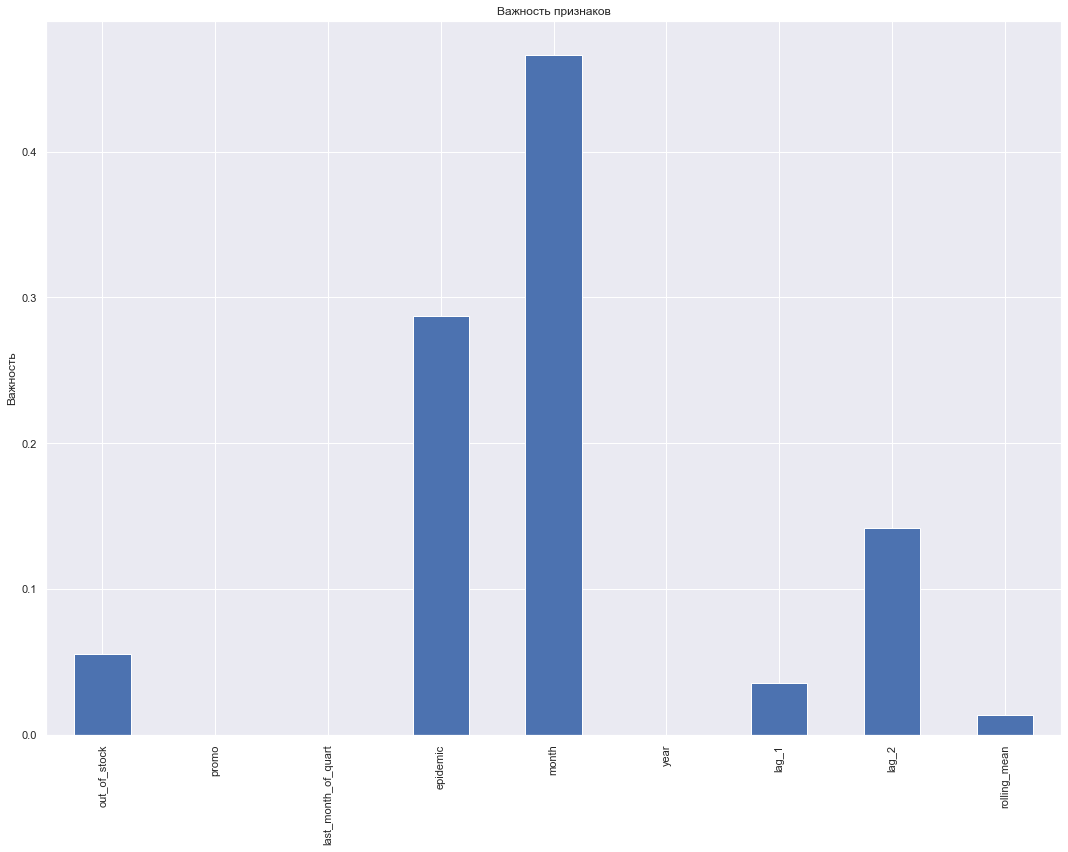

In [25]:
#оценка важности признаков
tree_imp = pd.Series(model.feature_importances_, features_train.columns)
fig, ax = plt.subplots(figsize=(15, 12))
tree_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

In [26]:
model_metrics(model, features_train, features_test, target_train, target_test)

MAE на обучении: 7222.186445417489
MAE на валидации: 21797.41320910973

Реальное кол-во в следующий месяц: 106632
Предсказанное кол-во: 111433.75


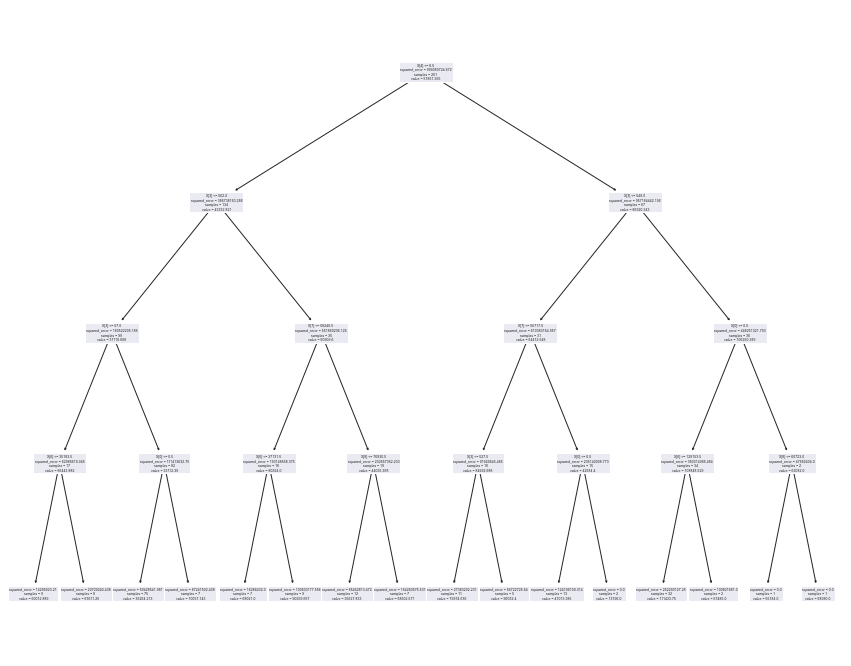

In [27]:
plt.figure(figsize=(15,12))
tree.plot_tree(model);

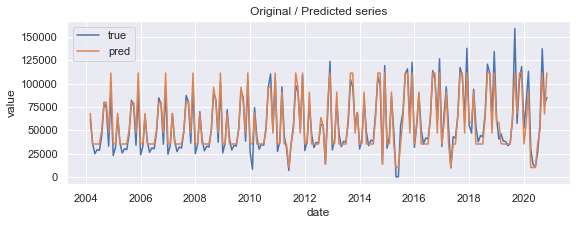

In [28]:
#сравним предсказания с реальными данными на обучении
temp_df = pd.DataFrame(model.predict(features_train), index=target_train.index)

plot_predict(temp_df, target_train)

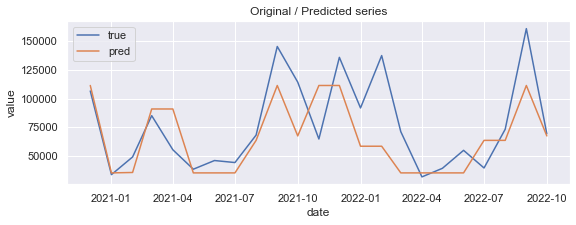

In [29]:
#сравним предсказания на тестовой выборке с реальными значениями
temp_df = pd.DataFrame(model.predict(features_test), index=target_test.index)

plot_predict(temp_df, target_test)

## Обучение RandomForest

In [30]:
# Переберем разные параметры модулем GridSearch
tuned_parameters = {'n_estimators': [100, 300, 500], 
                    'max_depth': [1, 3, 5, 7, 9], 
                    'min_samples_split': [1, 3, 5]}

 
clf = GridSearchCV(RandomForestRegressor(), 
                   tuned_parameters, 
                   cv=2,
                   n_jobs=-1, 
                   verbose=1)

clf.fit(features_train, target_train)
print(clf.best_estimator_)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
RandomForestRegressor(max_depth=5, min_samples_split=3)


In [31]:
frst = RandomForestRegressor(max_depth=9, min_samples_split=3, n_estimators=500)
frst.fit(features_train, target_train)
frst_pred = frst.predict(features_test)

mae_frst_train = mean_absolute_error(target_train, frst.predict(features_train))
mae_frst_test = mean_absolute_error(target_test, frst.predict(features_test))

model_metrics(frst, features_train, features_test, target_train, target_test)

MAE на обучении: 2291.141754203737
MAE на валидации: 17629.228487916844

Реальное кол-во в следующий месяц: 106632
Предсказанное кол-во: 112102.04738095238


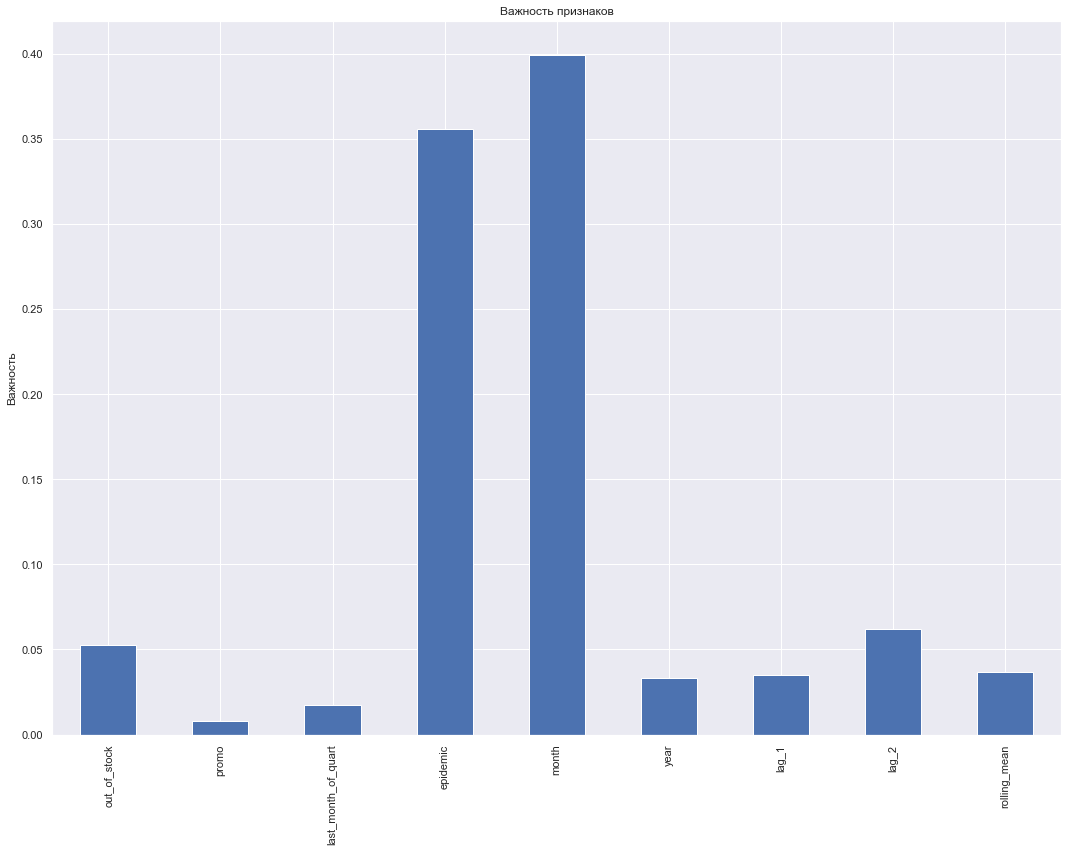

In [32]:
#оценка важности признаков
tree_imp = pd.Series(frst.feature_importances_, features_train.columns)
fig, ax = plt.subplots(figsize=(15, 12))
tree_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

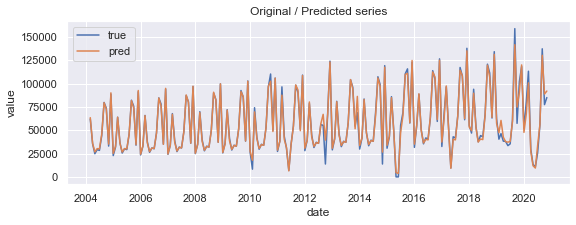

In [33]:
#сравним предсказания с реальными данными на обучении
temp_df = pd.DataFrame(frst.predict(features_train), index=target_train.index)

plot_predict(temp_df, target_train)

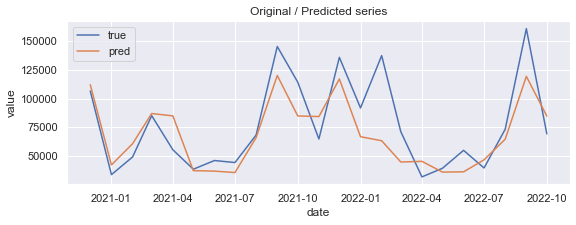

In [34]:
#сравним предсказания на тестовой выборке с реальными значениями
temp_df = pd.DataFrame(frst.predict(features_test), index=target_test.index)

plot_predict(temp_df, target_test)

## Обучение модели градиентного бустинга

In [35]:
# CatBoost с параметрами по умолчанию

cat_features = ['out_of_stock', 'promo', 'last_month_of_quart']

cat_reg = CatBoostRegressor(random_state=12345, iterations=40)
cat_reg.fit(features_train, target_train, cat_features=cat_features, verbose=False)
predictions_cat = cat_reg.predict(features_train)

In [36]:
mae_cat_reg_train = mean_absolute_error(target_train, cat_reg.predict(features_train))
mae_cat_reg_test = mean_absolute_error(target_test, cat_reg.predict(features_test))

model_metrics(cat_reg, features_train, features_test, target_train, target_test)

MAE на обучении: 1479.1469098267792
MAE на валидации: 16556.41600889939

Реальное кол-во в следующий месяц: 106632
Предсказанное кол-во: 128019.60573749102


In [37]:
#точность прогноза
print(f'Точность на 1-месячном отрезке {(1 - mae_cat_reg_test / (sum(target_test) / len(target_test))):.1%}')
print(f'Точность на всем валидационном отрезке {(1 - abs(sum(target_test) - sum(cat_reg.predict(features_test))) / sum(target_test)):.1%}')

Точность на 1-месячном отрезке 78.3%
Точность на всем валидационном отрезке 97.9%


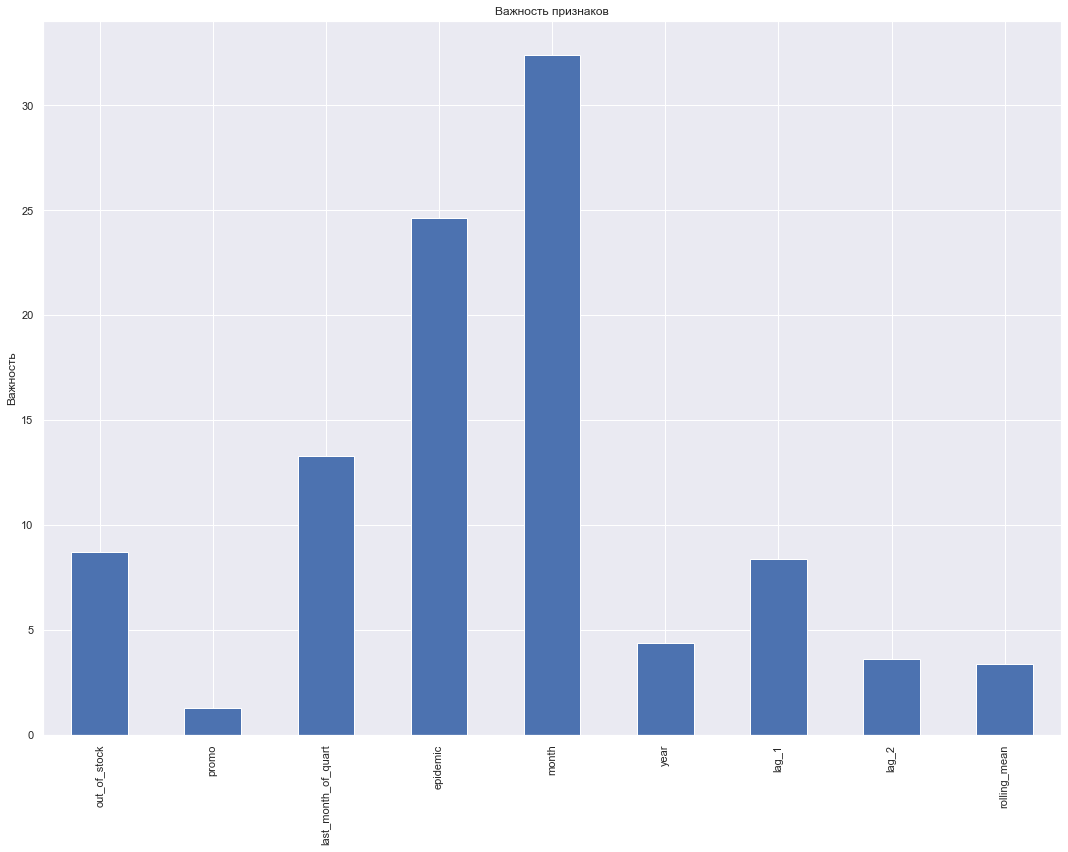

In [38]:
#оценка важности признаков
tree_imp = pd.Series(cat_reg.feature_importances_, features_train.columns)
fig, ax = plt.subplots(figsize=(15, 12))
tree_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

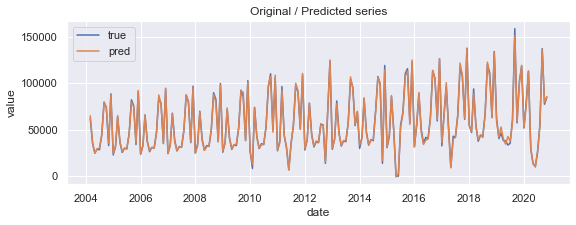

In [39]:
#сравним предсказания с реальными данными на обучении
temp_df = pd.DataFrame(predictions_cat, index=target_train.index)

plot_predict(temp_df, target_train)

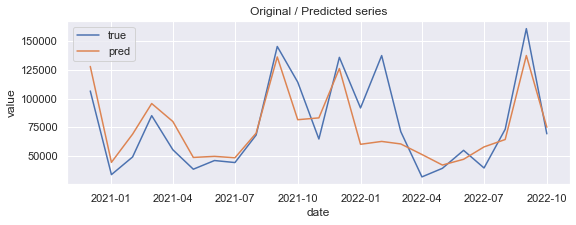

In [40]:
#сравним предсказания на тестовой выборке с реальными значениями
predictions_cat_test = cat_reg.predict(features_test)

temp_df = pd.DataFrame(predictions_cat_test, index=target_test.index)

plot_predict(temp_df, target_test)

## Cat Boost с подбором параметров GridSearch

In [41]:
%%time

#подберем параметры с помощью GridSearchCV
param_grid = [{
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [1, 3, 5, 7, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'random_state': [RANDOM_STATE],
    'iterations': [10, 20, 30, 40, 50]
}]

model_cb = CatBoostRegressor(verbose=False)

grid_search_cb = GridSearchCV(model_cb, param_grid, scoring='neg_mean_squared_error', cv=2)
grid_search_cb.fit(features_train, target_train)

mse = grid_search_cb.best_score_ 

print(f'score CatBoost: {mse}') 
print(f'Лучшие гиперпараметры: {grid_search_cb.best_params_}')

score CatBoost: -284559972.85058194
Лучшие гиперпараметры: {'depth': 5, 'iterations': 50, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'random_state': 12345}
CPU times: total: 18.1 s
Wall time: 48.6 s


In [42]:
#с полученными параметрами обучим модель
cat_grid = CatBoostRegressor(random_state=RANDOM_STATE,
                          depth=5,
                          l2_leaf_reg=1,
                          learning_rate=.1,
                          iterations=60)
cat_grid.fit(features_train, target_train, cat_features=cat_features, verbose=False, plot=False)
predictions_cat_2 = cat_grid.predict(features_test)

mae_cat_grid_train = mean_absolute_error(target_train, cat_grid.predict(features_train))
mae_cat_grid_test = mean_absolute_error(target_test, cat_grid.predict(features_test))

model_metrics(cat_grid, features_train, features_test, target_train, target_test)

MAE на обучении: 3467.5164278227344
MAE на валидации: 15616.693020463075

Реальное кол-во в следующий месяц: 106632
Предсказанное кол-во: 113610.96697757006


In [43]:
#точность прогноза
print(f'Точность на 1-месячном отрезке {(1 - mae_cat_grid_test / (sum(target_test) / len(target_test))):.1%}')
print(f'Точность на всем валидационном отрезке {(1 - abs(sum(target_test) - sum(cat_grid.predict(features_test))) / sum(target_test)):.1%}')

Точность на 1-месячном отрезке 79.6%
Точность на всем валидационном отрезке 90.6%


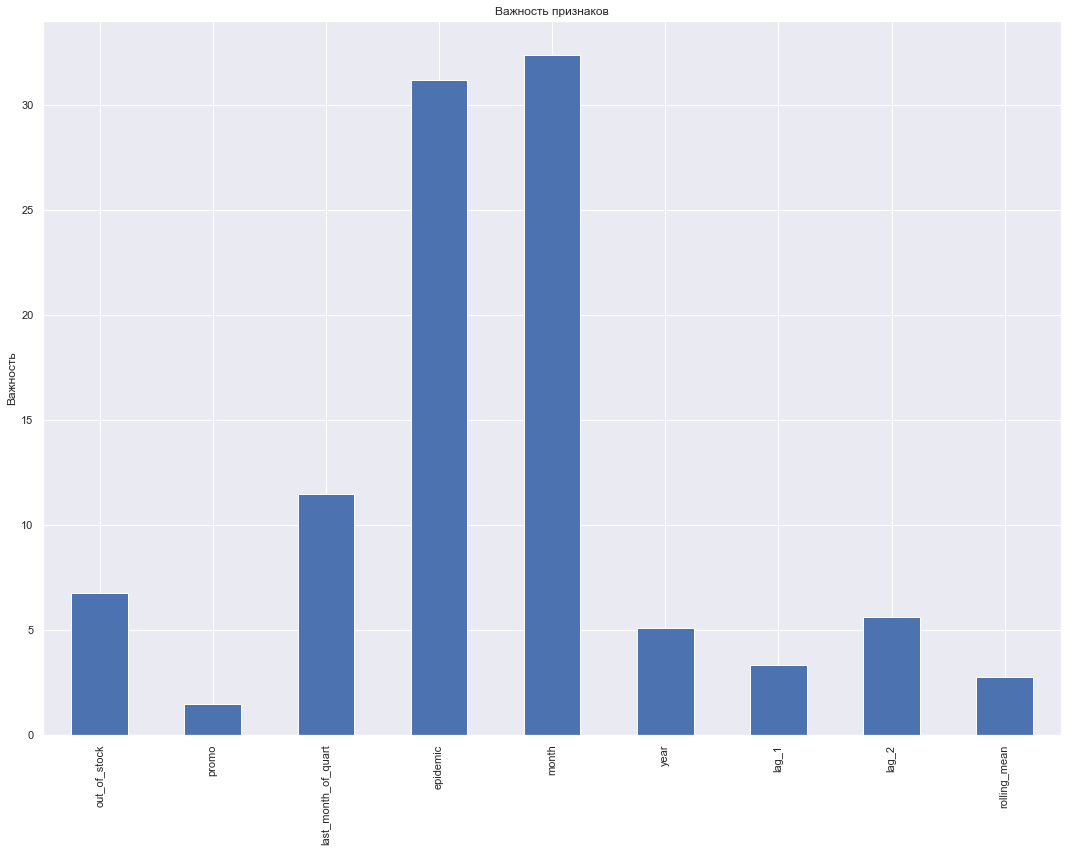

In [44]:
#оценка важности признаков
tree_imp = pd.Series(cat_grid.feature_importances_, features_train.columns)
fig, ax = plt.subplots(figsize=(15, 12))
tree_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

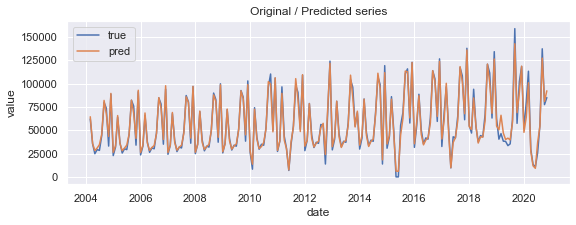

In [45]:
#сравним предсказания с реальными данными на обучении
temp_df = pd.DataFrame(cat_grid.predict(features_train), index=target_train.index)

plot_predict(temp_df, target_train)

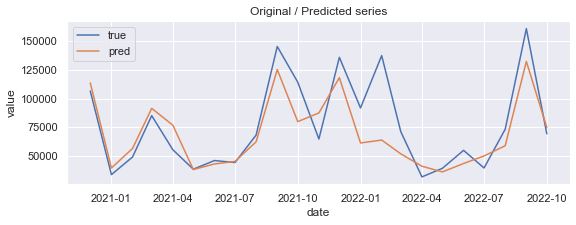

In [46]:
#сравним предсказания на тестовой выборке с реальными значениями
temp_df = pd.DataFrame(cat_grid.predict(features_test), index=target_test.index)

plot_predict(temp_df, target_test)

## Сравнение моделей

In [47]:
#сравнение моделей
comparison = pd.DataFrame({'model': ['LinearRegression', 'DecisionTree', 'RandomForest', 'CatBoost', 'CatBoost(GridSearch)', 'constant'], 
                    'MAE train': [mae_lr_train, mae_tree_train, mae_frst_train, mae_cat_reg_train, mae_cat_grid_train, mae_constant],
                    'MAE test': [mae_lr_test, mae_tree_test, mae_frst_test, mae_cat_reg_test, mae_cat_grid_test, mae_constant],
                    'Next month prediction': [predictions_lr[0], tree_pred[0], frst_pred[0], predictions_cat_test[0], predictions_cat_2[0], constant[0]]})

display(round(comparison))
print('Реальное кол-во в следующий месяц:', target_test[0])

,model,MAE train,MAE test,Next month prediction
0,LinearRegression,11059.0,16955.0,129864.0
1,DecisionTree,7222.0,21797.0,111434.0
2,RandomForest,2291.0,17629.0,112102.0
3,CatBoost,1479.0,16556.0,128020.0
4,CatBoost(GridSearch),3468.0,15617.0,113611.0
5,constant,31879.0,31879.0,76403.0


Реальное кол-во в следующий месяц: 106632


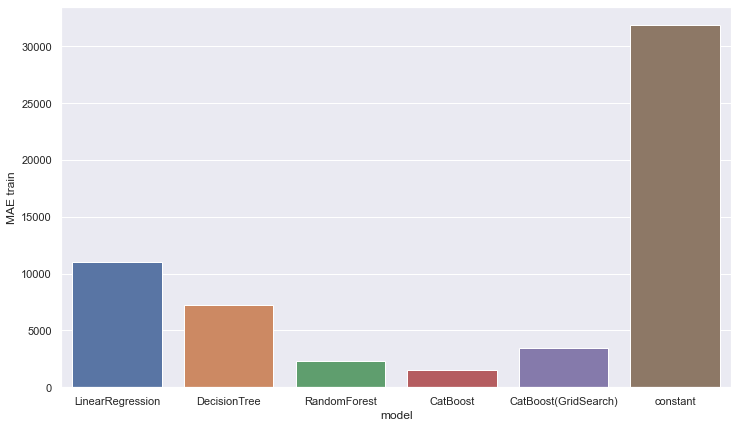

In [48]:
sns.set(rc={"figure.figsize":(12, 7)})
sns.barplot(comparison['model'], comparison['MAE train']);

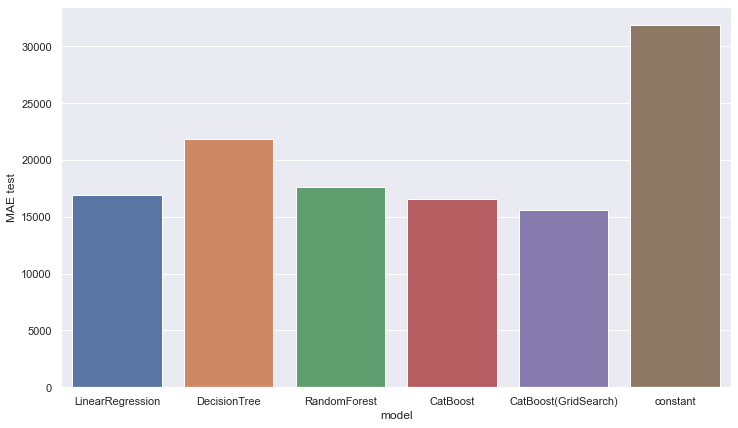

In [49]:
sns.barplot(comparison['model'], comparison['MAE test']);

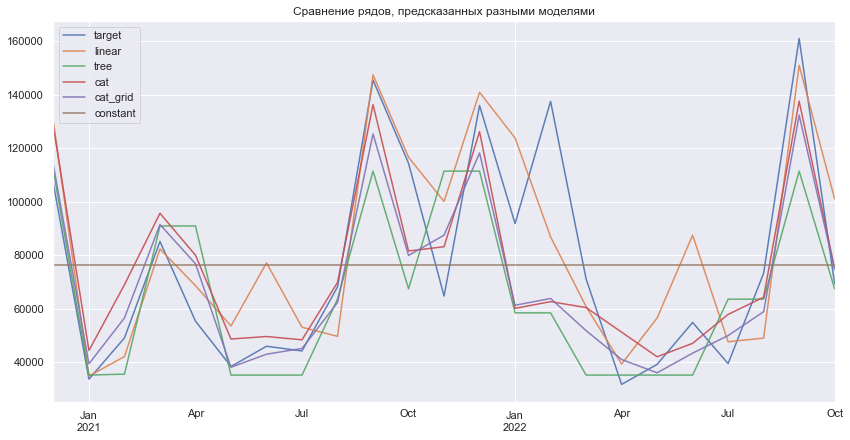

In [50]:
plot_data = pd.DataFrame()

plot_data['target'] = target_test
plot_data['linear'] = predictions_lr
plot_data['tree'] = tree_pred
plot_data['cat'] = predictions_cat_test
plot_data['cat_grid'] = predictions_cat_2
plot_data['constant'] = constant

plot_data.plot(figsize=(14,7), 
               title='Сравнение рядов, предсказанных разными моделями',
               grid=True,
               alpha=.9);

Лучше других выглядит модель CatBoost с гиперпараметрами, подобранными алгоритмом GridSearch. Модель также успешно проходит проверку на адекватность - МАЕ модели в 2 раза ниже чем у константной модели. Экспериментально подобрал лучшее кол-во итераций = 60. Т.к. датасет очень маленький, даже с учетом искуственного увеличения, большее количество итераций ведет к переобучению модели.

## Прогнозирование заболеваемости моделью ARIMA

In [51]:
epidemic = data.loc['2019-01-01':,'epidemic']

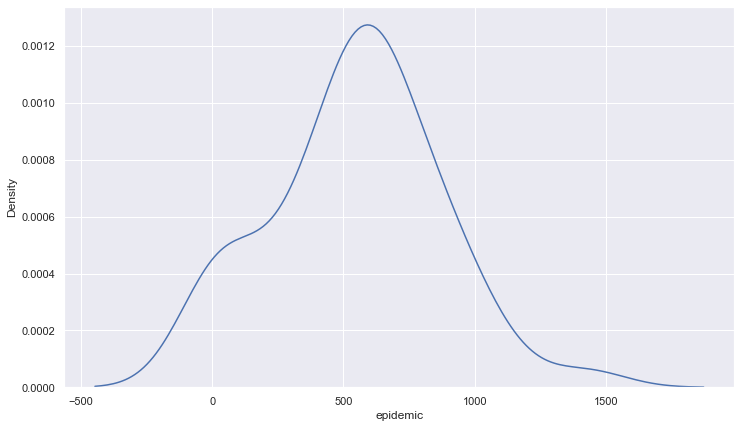

In [52]:
sns.distplot(epidemic, hist=False , kde=True);

In [53]:
res = adfuller(epidemic.values) 
print('Augmented Dickey-Fuller Statistic: %f' % res[0]) 
print('p-value: %f' % res[1])

Augmented Dickey-Fuller Statistic: -1.032087
p-value: 0.741382


Распределение близко к нормальному - не потребуется много манипуляций с рядом.
Тест Дики-Фуллера показывает p-value больше стат значимости, т.е. временной ряд нестационарен, потребуется дифференцирование.

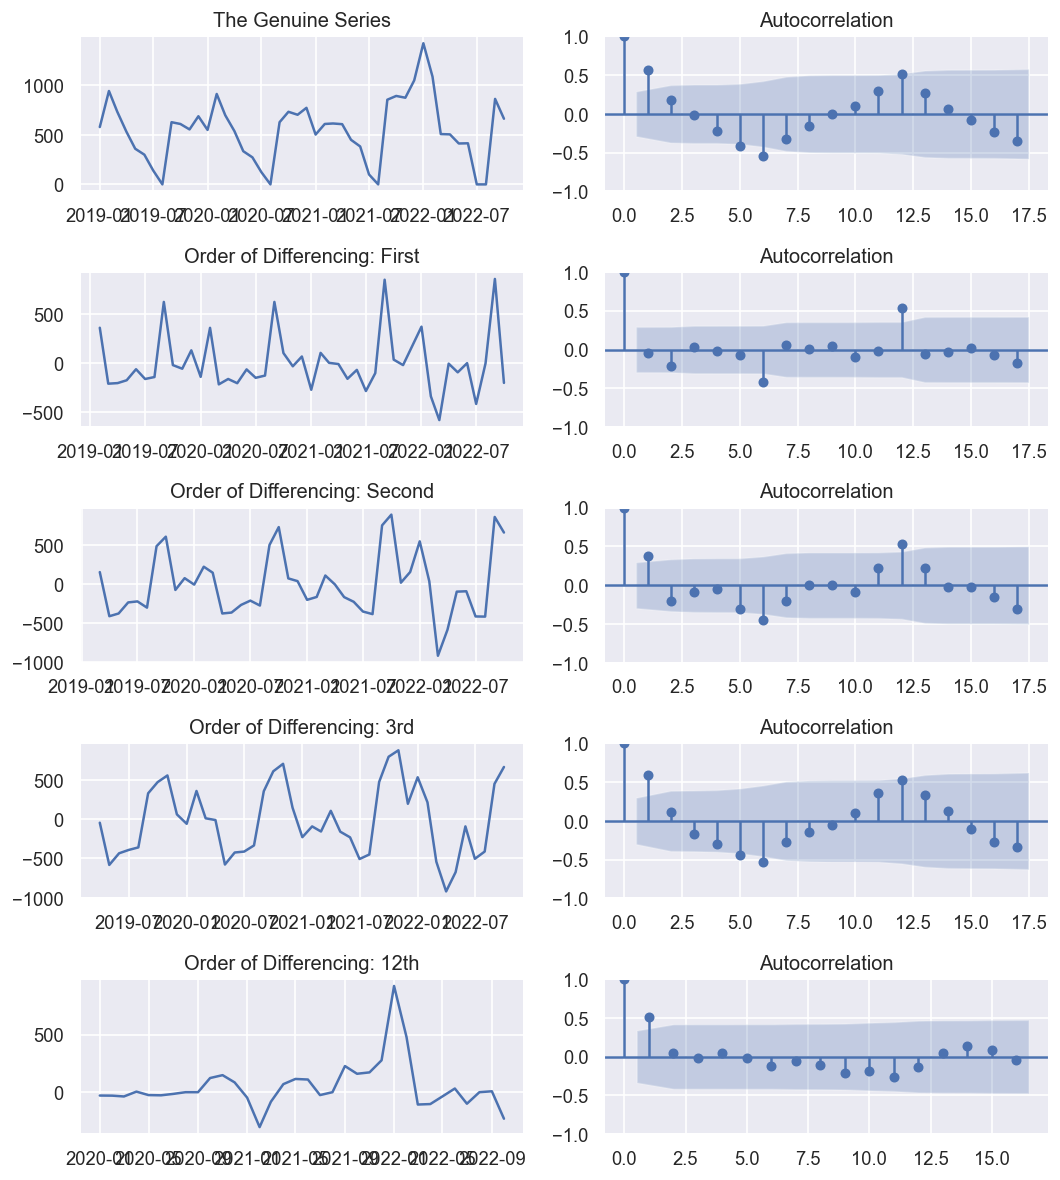

In [54]:
plt.rcParams.update({'figure.figsize' :(9,10), 'figure.dpi' : 120}) 
 
# The Genuine Series 
fig, axes = plt.subplots(5, 2, sharex = False) 
axes[0, 0].plot(epidemic); axes[0, 0].set_title('The Genuine Series') 
plot_acf(epidemic, ax = axes[0, 1]) 
 
# Order of Differencing: First 
axes[1, 0].plot(epidemic.diff(periods=1)); axes[1, 0].set_title('Order of Differencing: First') 
plot_acf(epidemic.diff(periods=1).dropna(), ax = axes[1, 1]) 
 
# Order of Differencing: Second 
axes[2, 0].plot(epidemic.diff(periods=2)); axes[2, 0].set_title('Order of Differencing: Second') 
plot_acf(epidemic.diff(periods=2).dropna(), ax = axes[2, 1]) 

# Order of Differencing: Third 
axes[3, 0].plot(epidemic.diff(periods=3)); axes[3, 0].set_title('Order of Differencing: 3rd') 
plot_acf(epidemic.diff(periods=3).dropna(), ax = axes[3, 1]) 


# Order of Differencing: 12th (seasonal) 
axes[4, 0].plot(epidemic.diff(periods=12)); axes[4, 0].set_title('Order of Differencing: 12th') 
plot_acf(epidemic.diff(periods=12).dropna(), ax = axes[4, 1]) 

plt.tight_layout()
plt.show()

При первом порядке дифференцирования автокорреляции почти не выходят за корридор статистической значимости. Значит первого порядка дифференцирования достаточно, чтобы ряд стал стационарным.

Запомним первые параметры для модели ARIMA:\
d=1\
сезон (m) = 12

In [55]:
#тест Дики-Фулера для дифференцированного ряда
res = adfuller(epidemic.diff(1).dropna()) 
print('Augmented Dickey-Fuller Statistic: %f' % res[0]) 
print('p-value: %f' % res[1])

Augmented Dickey-Fuller Statistic: -5.627145
p-value: 0.000001


p-value меньше 0.05 говорит, что дифференцированный ряд стал стационарным и теперь модель ARIMA может с ним работать

In [56]:
X = epidemic.diff(periods=1).dropna()

# Augmented Dickey Fuller Test 
adftest = ndiffs(X, test = 'adf') 
 
# KPSS Test 
kpsstest = ndiffs(X, test = 'kpss') 
 
# PP Test 
pptest = ndiffs(X, test = 'pp') 
 
print("ADF Test =", adftest) 
print("KPSS Test =", kpsstest) 
print("PP Test =", pptest)

ADF Test = 1
KPSS Test = 0
PP Test = 0


Нулевые дополнительные тесты также говорят о том, что ряд стационарен и с ним можно работать.

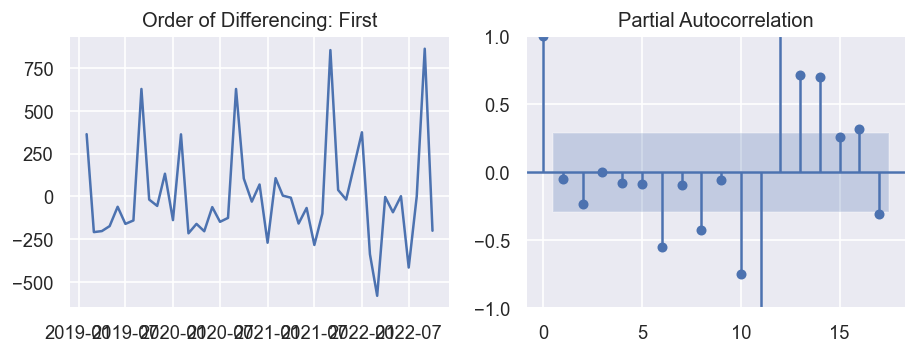

In [57]:
# подбор параметра p
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120}) 
 
fig, axes = plt.subplots(1, 2, sharex = False) 
axes[0].plot(epidemic.diff(periods=1)); axes[0].set_title('Order of Differencing: First') 
axes[1].set(ylim =(0,5)) 
plot_pacf(epidemic.diff(periods=1).dropna(), ax = axes[1]) 
 
plt.show()

p берется равным кол-ву первых точек, пересекающих предел значимости на графике Partial Autocorrelation. В нашем случае это 1. На выходящие за рамки коридора точки 6 и далее здесь можно не обращать внимание.

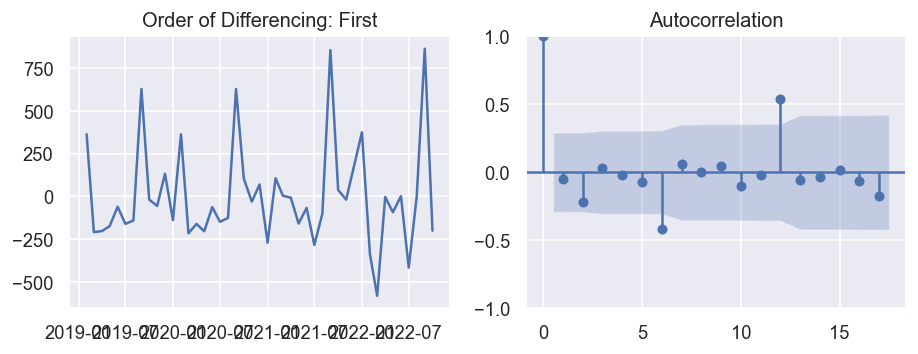

In [58]:
#подбор параметра q
plt.rcParams.update({'figure.figsize' :(9,3), 'figure.dpi' : 120})
fig, axes = plt.subplots(1, 2, sharex = False) 
axes[0].plot(epidemic.diff()); axes[0].set_title('Order of Differencing: First') 
axes[1].set(ylim =(0, 1.2)) 
plot_acf(epidemic.diff().dropna(), ax = axes[1]) 

plt.show()

q берется равным значению последнего лага, автокорреляция которого выходит за коридор стат. значимости. В нашем случае это 1, для надежности можно попробовать со значением 6

### Обучение

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=445.197, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=449.022, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=448.970, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=447.027, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=447.004, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=447.173, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=447.048, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=447.166, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.624 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   46
Model:             SARIMAX(0, 1, 0)x(0, 1, 0,

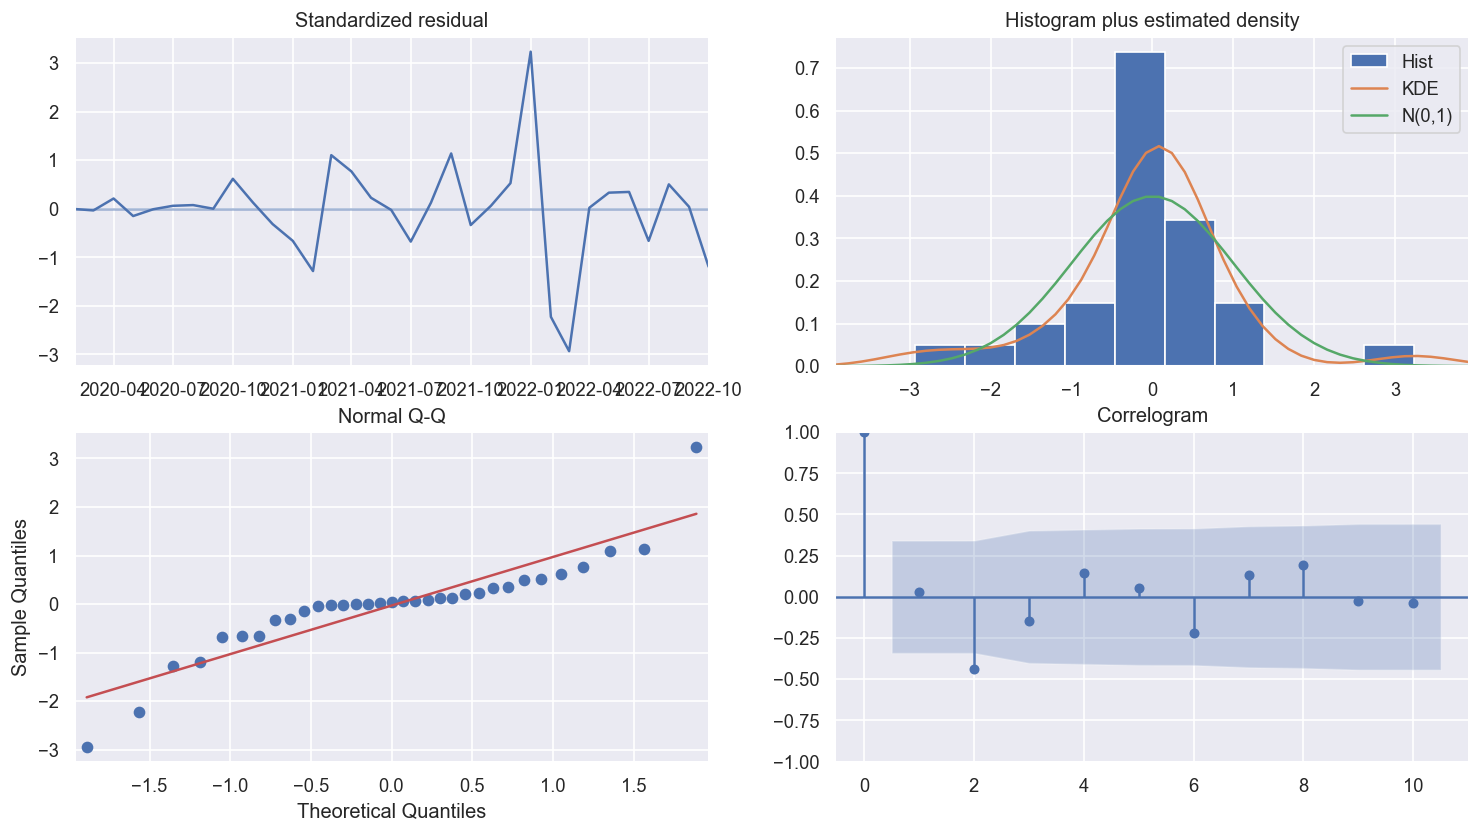

CPU times: total: 2.03 s
Wall time: 1.35 s


In [59]:
%%time

#поручим подбор оптимальных параметров алгоритму auto_arima
model_autoARIMA = auto_arima(epidemic, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=6, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Интерпретация результата.

Вверху слева: Остаточные ошибки колеблются вокруг среднего, равного нулю, и имеют равномерную дисперсию, тренд отсутствует. Это значит, что модель вобрала в себя всю информацию из временного ряда.

Вверху справа: График плотности распределения показывает, что остатки нормально распределены вокруг нулевого значения.

Внизу слева: Все точки должны в идеале должны совпадать с красной линией. Любые сильные отклонения означали бы, что распределение искажено.

Справа внизу: Коррелограмма, она же график ACF, показывает, что остаточные ошибки не являются автокоррелированными. Любая автокорреляция означала бы, что существует некоторая закономерность в остаточных ошибках. Это означало бы, что модель вобрала не всю информацию из временного ряда.

Результат работы auto_arima выглядит так, что можно приступать к прогнозированию.

С полученными оптимальными параметрами p, d и q создадим и обучим модель ARIMA.

In [60]:
p=0 #number of autoregressive terms (AR order)
d=1 #number of nonseasonal differences (differencing order)
q=1 #number of moving-average terms (MA order)

P=0 #Seasonal autoregressive order
D=1 #Seasonal difference order
Q=1 #Seasonal moving average
m=12 #number of time steps for a single seasonal period

# Creating SARIMAX model 
my_order = (p, d, q)
my_seasonal_order = (P, D, Q, m)

# define model
mymodel = SARIMAX(epidemic, order=my_order, seasonal_order=my_seasonal_order)
#mymodel = ARIMA(data, order=my_order)
modelfit = mymodel.fit() 
print(modelfit.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                           epidemic   No. Observations:                   46
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -221.485
Date:                            Wed, 01 Mar 2023   AIC                            448.970
Time:                                    16:58:31   BIC                            453.459
Sample:                                01-01-2019   HQIC                           450.480
                                     - 10-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0941      0.281      0.335      0.738      -0.457       0.645
ma.S.L12      -0.0818      0.666   

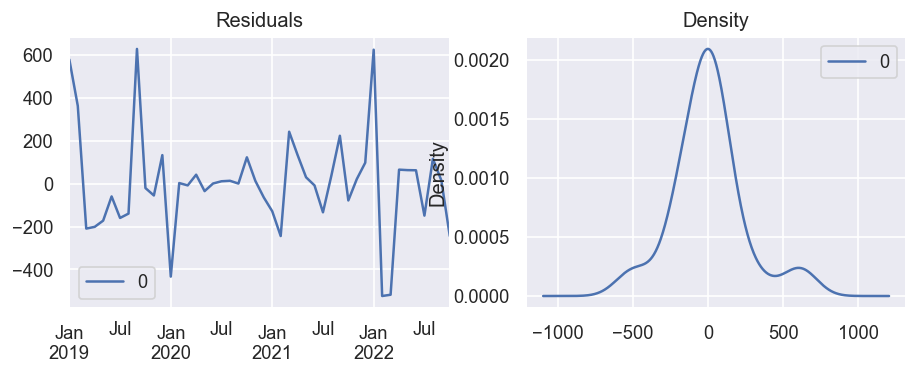

In [61]:
# Выведем остатки (ошибки модели) на график
plt.rcParams.update({'figure.figsize' :(9,3), 'figure.dpi' : 120})
myresiduals = pd.DataFrame(modelfit.resid) 
fig, ax = plt.subplots(1, 2) 
myresiduals.plot(title = "Residuals", ax = ax[0]) 
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1]) 
plt.show()

График остатков похож на шум - не имеет тренда и сезонности, а распределение ошибок нормальное, значит модель вобрала всю доступную информацию из временного ряда.

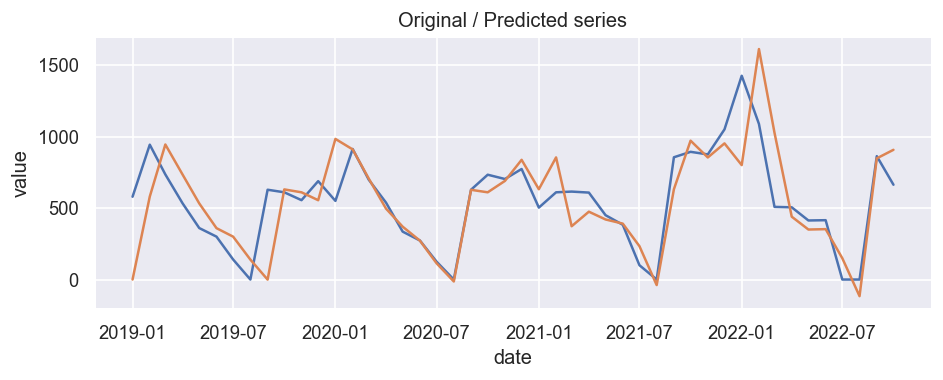

In [62]:
#прогнозирование
predictions = modelfit.predict(dynamic = False)

plt.figure(figsize=(9, 3))
plt.plot(epidemic)
plt.plot(predictions)
plt.xlabel('date')
plt.ylabel('value')
plt.title('Original / Predicted series')
plt.show() 

### Прогноз

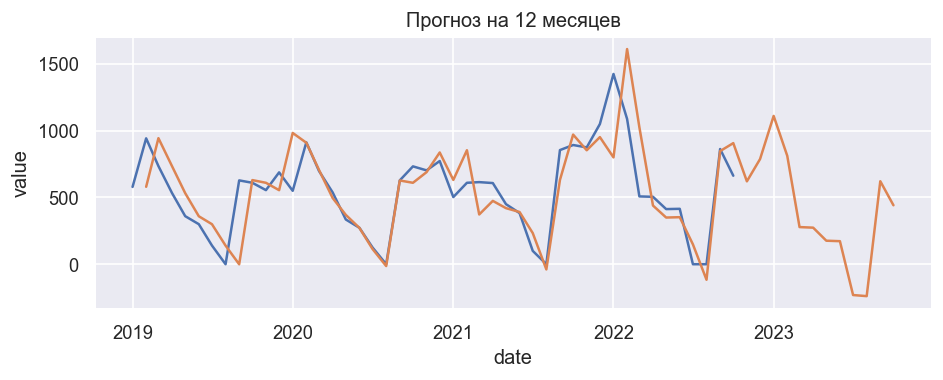

In [63]:
forecast_periods = 12
epidemic_forecast = modelfit.predict(1, len(epidemic)+forecast_periods-1)

plt.figure(figsize=(9, 3))
plt.plot(epidemic)
plt.plot(epidemic_forecast)
plt.xlabel('date')
plt.ylabel('value')
plt.title(f'Прогноз на {forecast_periods} месяцев')
plt.show()

In [64]:
epidemic_forecast[-forecast_periods:]

2022-11-01     620.886293
2022-12-01     787.713655
2023-01-01    1110.839145
2023-02-01     811.880044
2023-03-01     278.275162
2023-04-01     273.901264
2023-05-01     176.216696
2023-06-01     172.605951
2023-07-01    -230.696593
2023-08-01    -239.053757
2023-09-01     621.771128
2023-10-01     441.625360
Freq: MS, Name: predicted_mean, dtype: float64

Некоторые значения получились отрицательными. Т.к. заболеваемость не может быть отрицательной, приравняем такие значения к нулю.

In [65]:
#epidemic_forecast = pd.DataFrame(epidemic_forecast)
for i in range(len(epidemic_forecast)):
    if epidemic_forecast[i] < 0:
        epidemic_forecast[i] = 0

In [66]:
#для сохранения прогноза заболеваемости в excel-файл нужно раскомментировать строчку ниже и запустить ячейку
#forecast[-12:].to_excel('epidemic_forecast.xlsx')

Мы получили прогноз заболеваемости на 12 месяцев, на основе которого можем прогнозировать продажи.

## Тестирование лучшей модели

Перед запуском проекта с командой аналитиков заказчика мы договорились, что данные мне предоставят без последних трех месяцев. При презентации проекта мы протестировали финальную модель на данных за эти 3 месяца.

In [67]:
#лучшую модель обучаем на всей выборке
features = data.drop(['Q-ty'], axis=1)
target = data['Q-ty']

In [68]:
#лучшая модель

cat_features = ['out_of_stock', 'promo', 'last_month_of_quart']


model = CatBoostRegressor(random_state=RANDOM_STATE,
                          depth=5,
                          l2_leaf_reg=1,
                          learning_rate=.1,
                          iterations=50)

model.fit(features, target, cat_features=cat_features, verbose=False, plot=False)

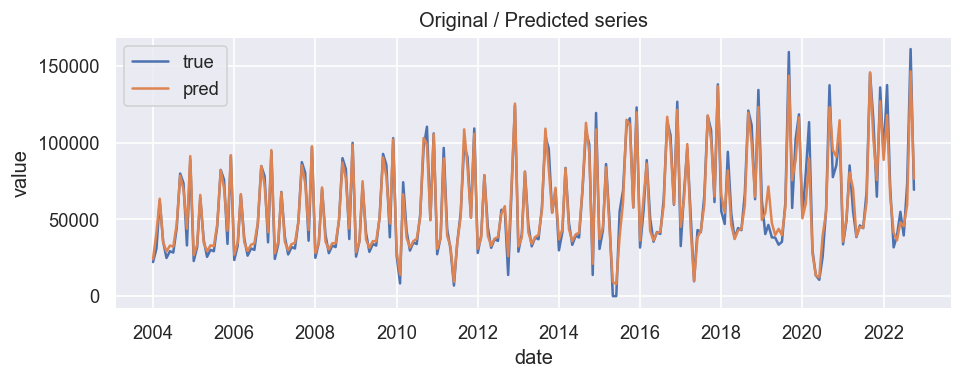

In [69]:
#сравним предсказания с реальными данными на обучении
temp_df = pd.DataFrame(model.predict(features), index=target.index)

plot_predict(temp_df, target)

In [70]:
#функция прогнозирования

df = data.tail(4)

def next_month_prediction(df, model, out_of_stock=0, promo=0):

    if (df.index.max()+relativedelta(months=+1)).month in [3, 6, 9, 12]:
        last_month_of_quart = 1
    else:
        last_month_of_quart = 0
    
    df.loc[df.index.max()+relativedelta(months=+1)] = [
                            None, 
                            out_of_stock, 
                            promo,
                            last_month_of_quart,
                            epidemic_forecast[df.index.max()+relativedelta(months=+1)],
                            (df.index.max()+relativedelta(months=+1)).month, 
                            (df.index.max()+relativedelta(months=+1)).year, 
                            df.loc[df.index.max()+relativedelta(months=0), 'Q-ty'], 
                            df.loc[df.index.max()+relativedelta(months=-1), 'Q-ty'], 
    (df.loc[df.index.max()+relativedelta(months=0), 'Q-ty'] + df.loc[df.index.max()+relativedelta(months=-1), 'Q-ty'])/2
    ]
    
    df[cat_features] = df[cat_features].astype('int')
    df.loc[df.index.max(), 'Q-ty'] = model.predict(df.tail(1).drop(['Q-ty'], axis=1))
    return df

In [72]:
#прогноз на 1й месяц
df = next_month_prediction(df, model, out_of_stock=0, promo=0)

#прогноз на 2й месяц
df = next_month_prediction(df, model, out_of_stock=0, promo=1)

#прогноз на 3й месяц
df = next_month_prediction(df, model, out_of_stock=0, promo=0)

df['Q-ty'].tail(3)

2022-11-01     81756.288710
2022-12-01    130926.923142
2023-01-01     61837.164491
Name: Q-ty, dtype: float64

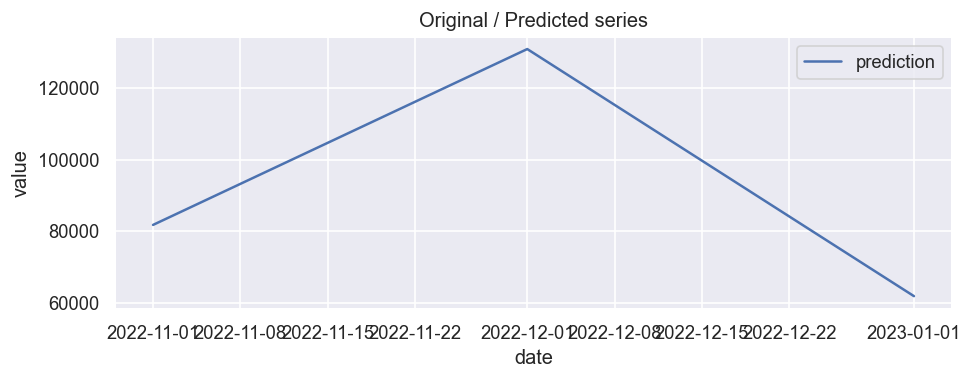

In [73]:
#график прогноза на 3 месяца
plt.figure(figsize=(9, 3))
plt.plot(df['Q-ty'].tail(3), label='prediction')
plt.xlabel('date')
plt.ylabel('value')
plt.title('Original / Predicted series')
plt.legend()
plt.show() 

In [74]:
data_df = pd.concat([data] + [df.tail(3)])

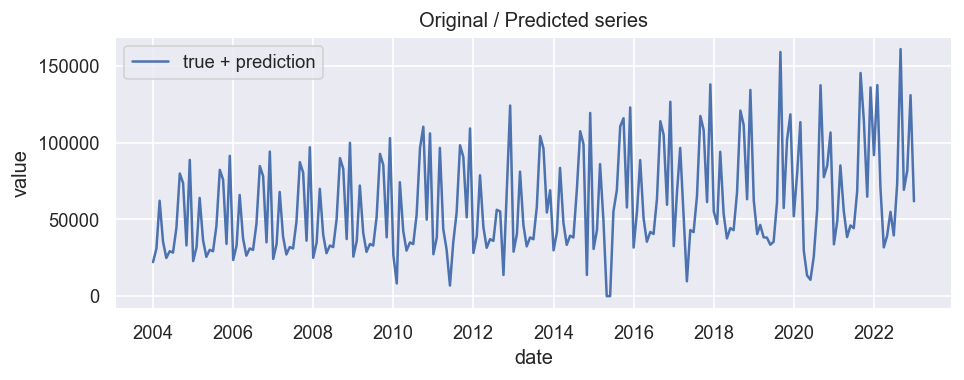

In [75]:
#график история + прогноз
plt.figure(figsize=(9, 3))
plt.plot(data_df['Q-ty'], label='true + prediction')
plt.xlabel('date')
plt.ylabel('value')
plt.title('Original / Predicted series')
plt.legend()
plt.show()

In [76]:
#во время презентации вносим в список y_true реальные продажи за тестовые 3 месяца и проверяем точность модели

y_true = [82537, 169674, 56438]
y_pred = df['Q-ty'].tail(3)

print('MAE помесячного прогноза', mean_absolute_error(y_true, y_pred))
print('Отклонение по кварталу', abs(sum(y_true) - sum(y_pred)))

MAE помесячного прогноза 14975.650879930907
Отклонение по кварталу 34128.623657588556


In [77]:
#точность прогноза
print(f'Точность на 1-месячном отрезке {(1 - mean_absolute_error(y_true, y_pred) / (sum(y_true) / len(y_true))):.1%}')
print(f'Точность на 3-месячном отрезке {(1 - abs(sum(y_true) - sum(y_pred)) / sum(y_true)):.1%}')

Точность на 1-месячном отрезке 85.4%
Точность на 3-месячном отрезке 88.9%


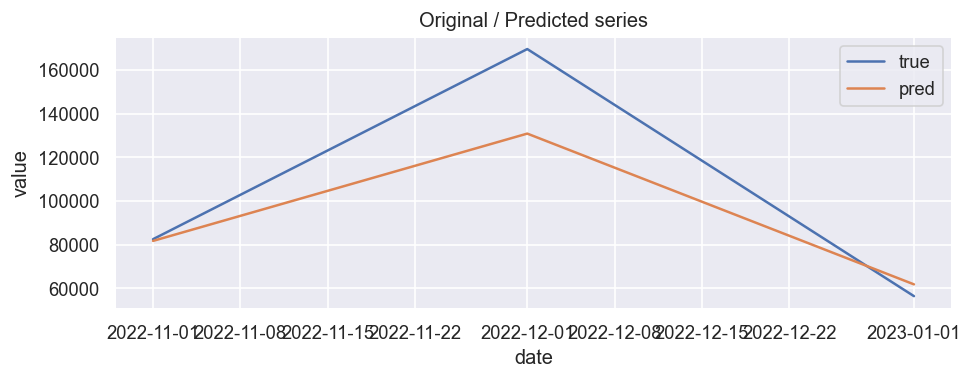

In [78]:
#сравним предсказания с реальными данными на тестовом периоде
temp_df = pd.DataFrame(y_true, index=y_pred.index)

plt.figure(figsize=(9, 3))
plt.plot(temp_df, label='true')
plt.plot(y_pred, label='pred')
plt.xlabel('date')
plt.ylabel('value')
plt.title('Original / Predicted series')
plt.legend()
plt.show() 

In [79]:
#сохранение прогноза в excel-файл
forecast = pd.DataFrame(df['Q-ty'].tail(3))
forecast.columns = ['Brand 1']
#forecast.to_excel('Brand 1 forecast.xlsx')

## Вывод

Итоговая модель достигла целевых метрик - минимум 80% точности, в идеале 90% и более.

Точность модели на валидации:
На 1-месячном отрезке 79.6%
На всем валидационном отрезке (2 года) 90.6%

Точность модели на тестировании:
На 1-месячном отрезке 85.4%
На 3-месячном отрезке 88.9%

Чем больше горизонт планирования, тем выше точность прогноза. Со своей первоочередной задачей - прогнозированием спроса на несколько месяцев вперед для эффективного управления складскими запасами, модель справляется и готова к внедрению в тех процесс компании.

Изначальная выборка представляла собой временной ряд с данными за последние 46 месяцев. Авторегрессия на такой маленьком датасете не давала нужного результата, поэтому я сделал следующие шаги для повышения качества прогнозирования:
1. Добавил синтетические признаки `out_of_stock` - дефектура, 
`promo` - значительные промо-активности, 
`high_season` - высокий сезон,
`last_month_of_quart` - последний месяц квартала, 
`epidemic` - заболеваемость гриппом и ОРВИ на 100 000 человек.

Признак `high_season` в итоге приводил к мультиколлинеарности, поэтому в итоговой модели он не используется.

2. Т.к. при прогнозировании продаж мы не знаем будущей заболеваемости, я с помощью модели ARIMA сделал прогноз заболеваемости на год вперед и этот прогноз потом используется при прогнозировании продаж. Параметры ARIMA подобраны модулем `auto_arima`.

3. Т.к. в алгоритмы ML заложена некоторая доля "неуверенности", я искусственно увеличил выборку - добавил данные за 15 предыдущих лет, цифры которых незначительно отличаются от реальных данных. В искусственной выборке я добавил иммитацию нескольких случаев дефектуры и промо-активностей, чтобы модель лучше усвоила связи между этими явлениями и таргетом.

Итоговая модель, обеспечившая лучшие метрики:

`CatBoostRegressor(random_state=RANDOM_STATE,
                          depth=5,
                          l2_leaf_reg=1,
                          learning_rate=.1,
                          iterations=60)`
                          
Т.к. даже искусственно раздутая выборка получилась небольшой, количество итераций ограничено 60 во избежание переобучения.

MAE модели на валидации = 15617, что в 2 раза лучше показателя константной модели - 31879.
В месяц, следующий за последним месяцем выборки реальные продажи составили 106 632 у.е., прогноз модели = 113 611, т.е. отклонение составило всего 6,5%.

Код оптимизирован для пользования неопытным пользователем python: достаточно прописать путь к исходному excel-файлу, запустить код и получить на выходе excel-файл с прогнозом.